In [1]:
import pandas as pd 
import plotly.graph_objects as go
from tqdm import tqdm

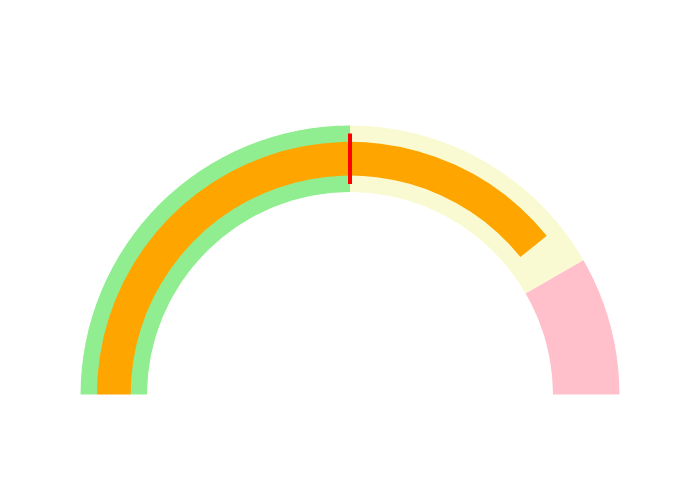

In [33]:
indicator = dict(
    domain = {'x': [0, 1], 'y': [0, 1]},
    mode = "gauge",
)

gauge = {
    'axis': {
        'range': [None, 120], 'tickcolor': 'white',
    },
    'bordercolor': "white",
    'steps' : [
        {'range': [0, 60], 'color': "lightgreen"},
        {'range': [60, 100], 'color': "lightgoldenrodyellow"},
        {'range': [100, 150], 'color': "pink"},
    ],
}

# 'threshold': 


def create_chart(value, max_value=0):
    my_indicator = dict(indicator)
    my_indicator['value'] = value

    my_gauge = dict(gauge)
    if max_value > 0:
        my_gauge['threshold'] = {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': max_value}
    
    color='green'
    if 60 < value < 100:
        color='orange'
    elif 100 < value:
        color='red'
    my_gauge['bar'] = dict(color=color)
    
    my_indicator['gauge'] = my_gauge
    
    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = {'color': "white", 'family': "Arial"}
    )
    return go.Figure(data=go.Indicator(**my_indicator), layout=layout)

from IPython.display import Image
Image(create_chart(94, 60).to_image(format="png"))

In [34]:
data = pd.read_csv("../data/combined.csv")

plot_subset = data[::10].copy().reset_index()
for row in tqdm(plot_subset.iterrows(), total=plot_subset.shape[0]):
    speed = row[1]['Velocity (KPH)']
    max_speed = plot_subset[0:row[0]+1]['Velocity (KPH)'].max()
    fig = create_chart(speed, max_speed)
    fig.write_image(f"../images/speed-{row[0]:05d}.png")

100%|█████████████████████████████████████████████████████████████████████████████████| 6239/6239 [07:13<00:00, 14.38it/s]
